<a href="https://colab.research.google.com/github/AdrianAlbrecht/Collab/blob/main/SSI_mu%2Blambda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import warnings
warnings.filterwarnings('ignore')
import random
import math
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

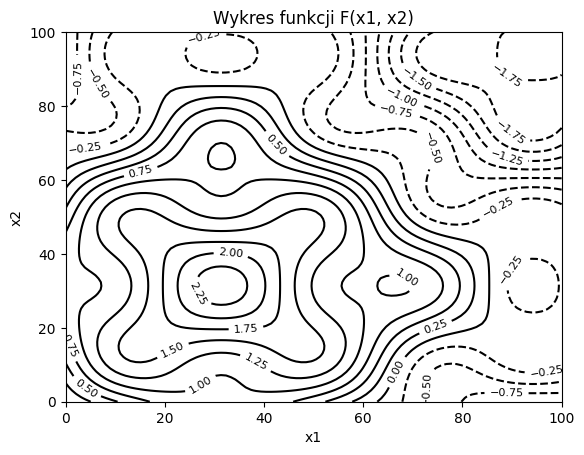

In [7]:
x1 = np.linspace(0, 100, 100)
x2 = np.linspace(0, 100, 100)
X1, X2 = np.meshgrid(x1, x2)

F = np.sin(X1 * 0.05) + np.sin(X2 * 0.05) + 0.4 * np.sin(X1 * 0.15) * np.sin(X2 * 0.15)
contours = plt.contour(X1, X2, F, levels=20, colors='black')
plt.clabel(contours, inline=True, fontsize=8)
plt.title('Wykres funkcji F(x1, x2)')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [11]:
def fitness(x1, x2):
    return np.sin(x1 * 0.05) + np.sin(x2 * 0.05) + 0.4 * np.sin(x1 * 0.15) * np.sin(x2 * 0.15)

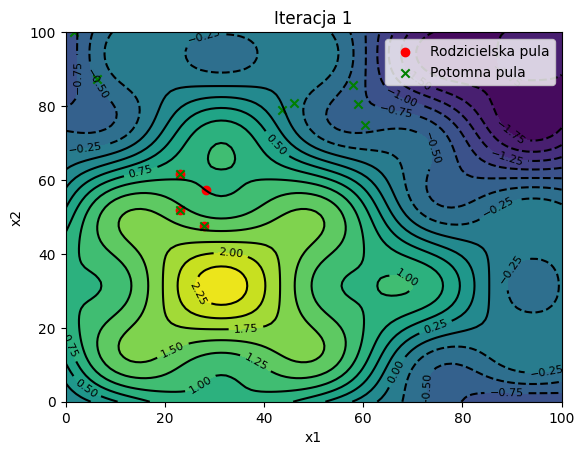

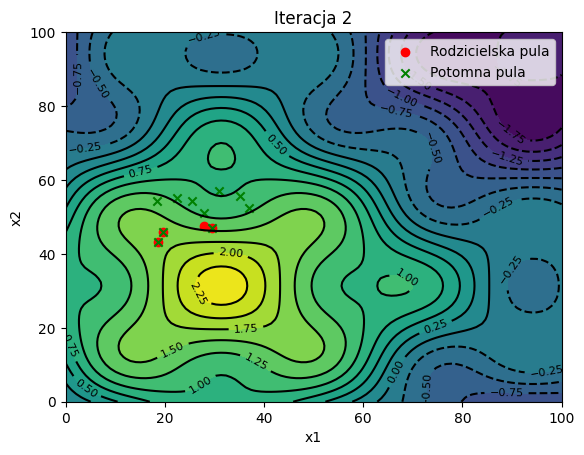

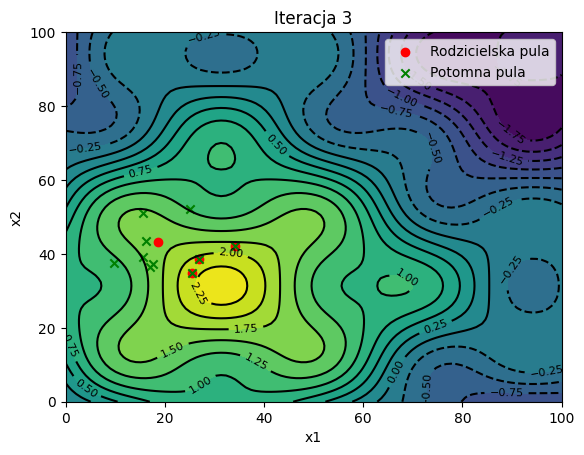

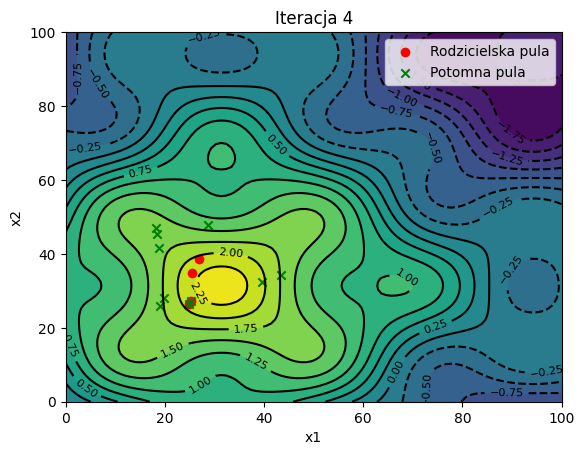

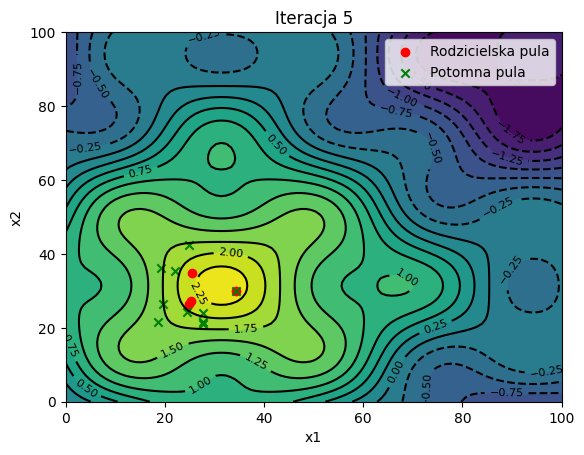

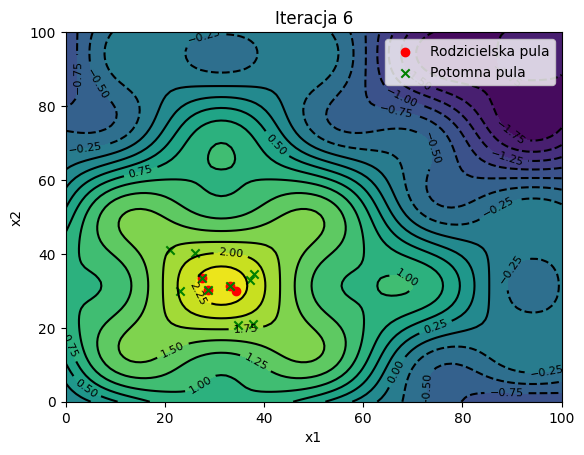

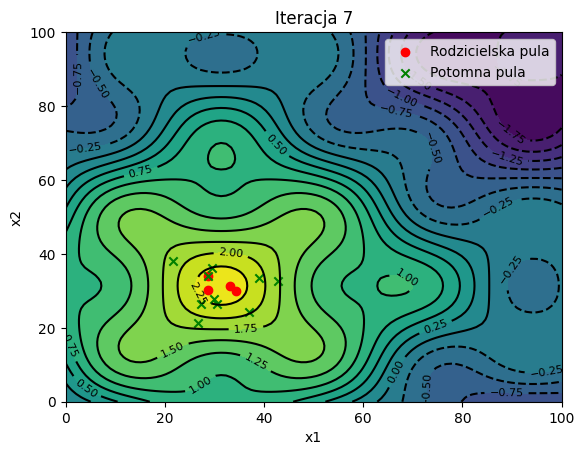

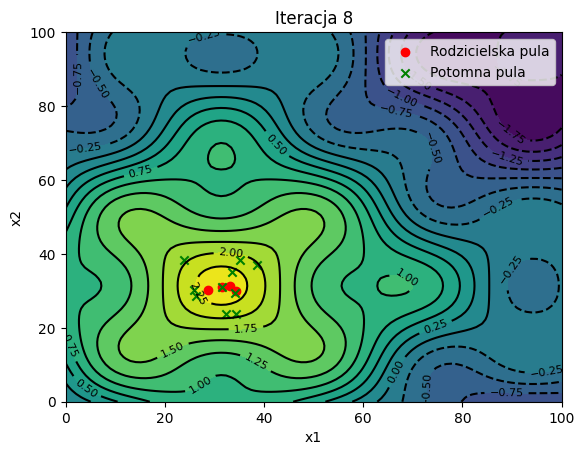

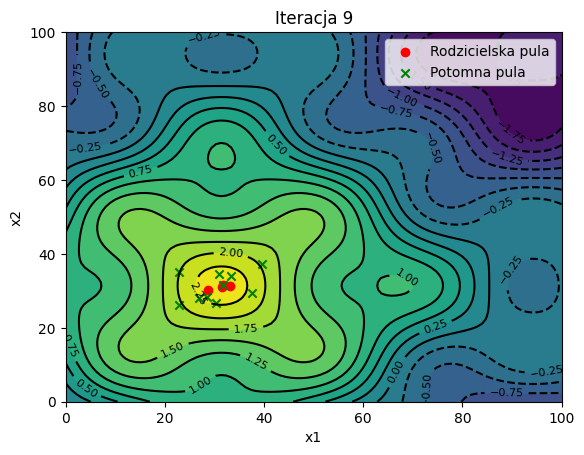

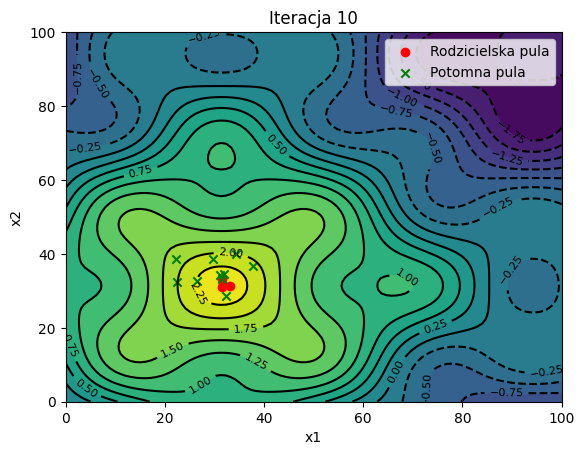

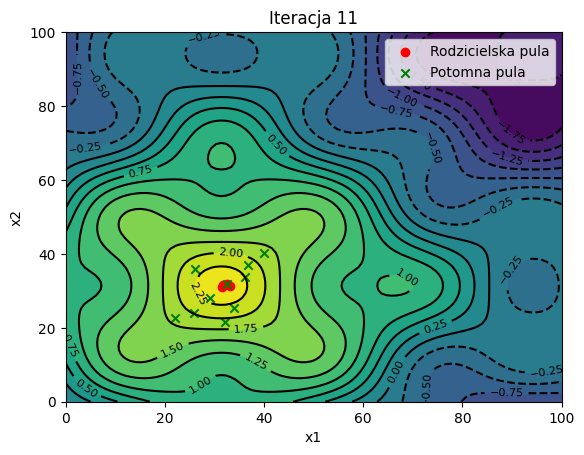

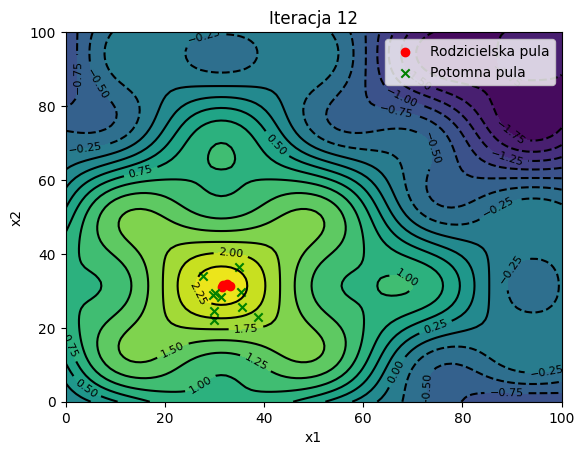

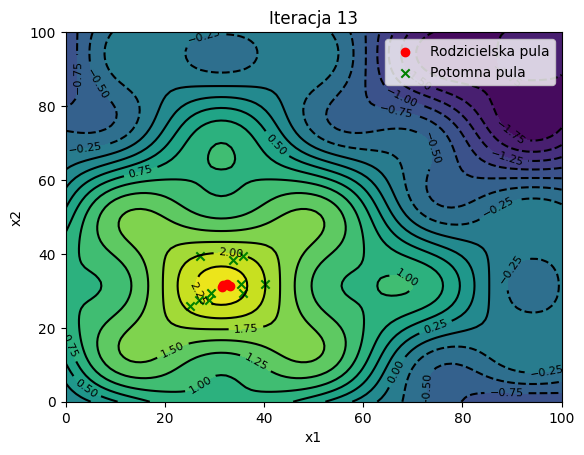

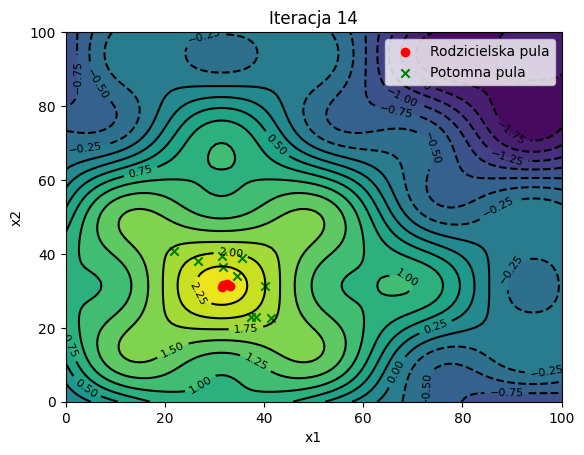

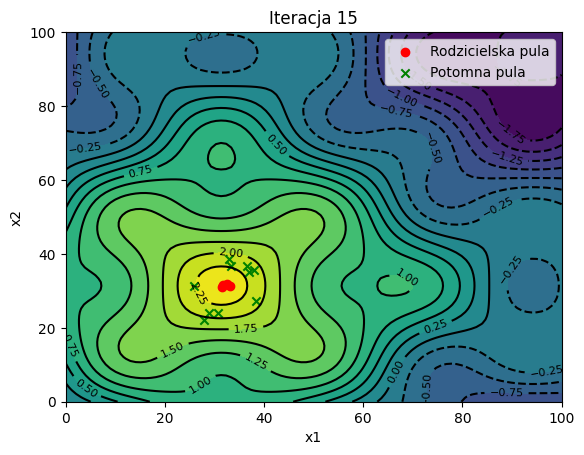

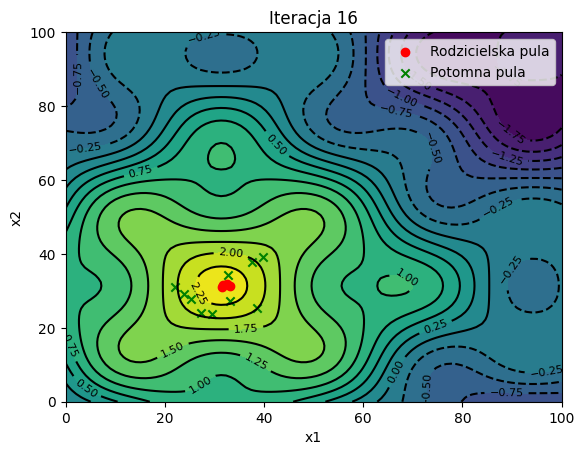

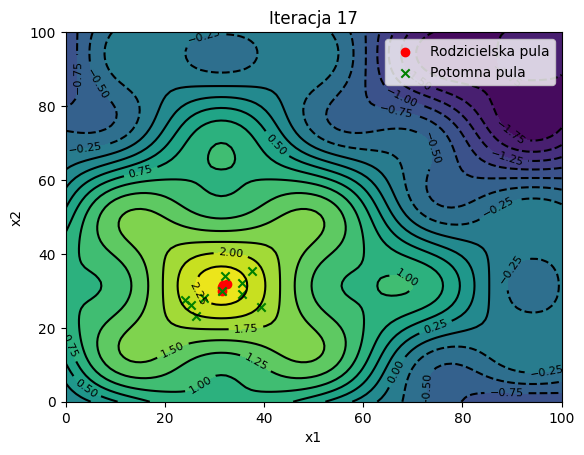

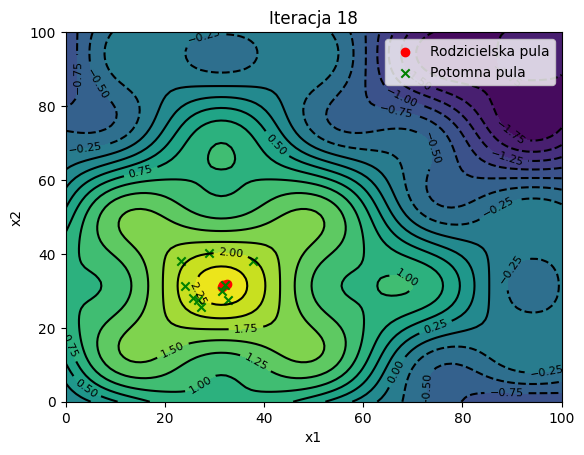

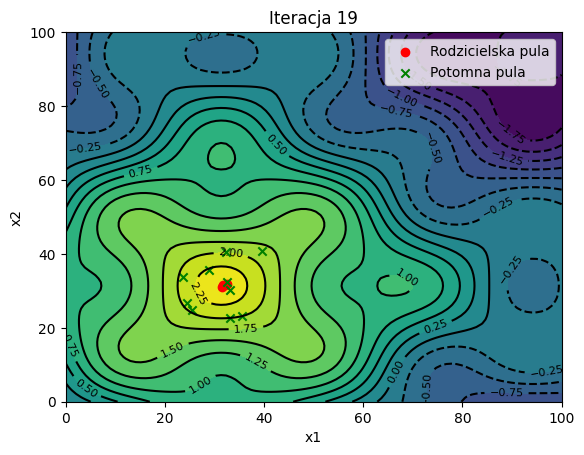

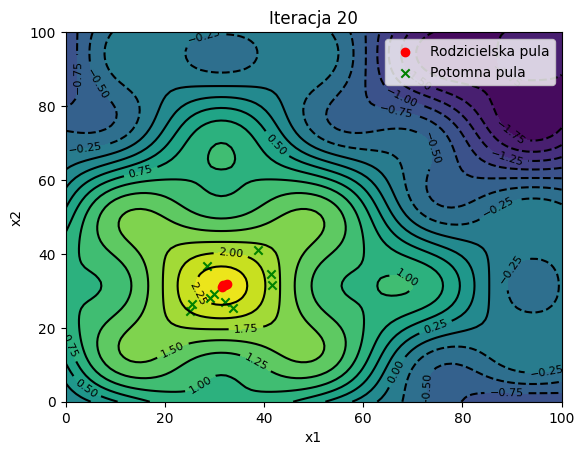

Najlepszy osobnik: [31.623528976200546, 31.54440045617674]
Wartość funkcji przystosowania: 2.39965732968639


In [16]:
# Parametry algorytmu
mu = 4  # Rozmiar puli rodzicielskiej
lambda_ = 10  # Rozmiar puli potomnej
iterations = 20
tournament_size = 2
mutation_level = 10.0

x1_range = [0, 100]
x2_range = [0, 100]


parent_pool = []
for _ in range(mu):
    x1 = np.random.uniform(x1_range[0], x1_range[1])
    x2 = np.random.uniform(x2_range[0], x2_range[1])
    parent_pool.append([x1, x2])

x1_values = np.linspace(x1_range[0], x1_range[1], 100)
x2_values = np.linspace(x2_range[0], x2_range[1], 100)
X1, X2 = np.meshgrid(x1_values, x2_values)
F = fitness(X1, X2)

# Główna pętla ewolucyjna
for iteration in range(iterations):
    parent_fitness = [fitness(x[0], x[1]) for x in parent_pool]
    offspring_pool = []
    for _ in range(lambda_):
        tournament_indices = np.random.choice(len(parent_pool), size=tournament_size, replace=False)
        tournament = [parent_pool[i] for i in tournament_indices]
        best_individual = max(tournament, key=lambda x: fitness(x[0], x[1]))
        mutated_x = [x + np.random.uniform(-mutation_level, mutation_level) for x in best_individual]
        mutated_x[0] = max(x1_range[0], min(x1_range[1], mutated_x[0]))
        mutated_x[1] = max(x2_range[0], min(x2_range[1], mutated_x[1]))
        offspring_pool.append(mutated_x)
    offspring_fitness = [fitness(x[0], x[1]) for x in offspring_pool]

    combined_pool = parent_pool + offspring_pool
    sorted_combined_pool = [x for _, x in sorted(zip(parent_fitness + offspring_fitness, combined_pool), reverse=True)]
    parent_pool = sorted_combined_pool[:mu]

    plt.figure()
    plt.contourf(X1, X2, F, levels=20, cmap='viridis')
    contours = plt.contour(X1, X2, F, levels=20, colors='black')
    plt.clabel(contours, inline=True, fontsize=8)
    parent_points = np.array(parent_pool)
    offspring_points = np.array(offspring_pool)
    plt.scatter(parent_points[:, 0], parent_points[:, 1], c='r', marker='o', label='Rodzicielska pula')
    plt.scatter(offspring_points[:, 0], offspring_points[:, 1], c='g', marker='x', label='Potomna pula')
    plt.title(f'Iteracja {iteration + 1}')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

# Najlepszy osobnik z puli rodzicielskiej
best_individual = max(parent_pool, key=lambda x: fitness(x[0], x[1]))
print("Najlepszy osobnik:", best_individual)
print("Wartość funkcji przystosowania:", fitness(best_individual[0], best_individual[1]))